In [1]:
import torch
print(torch.__version__)

2.1.0


### Mnist classification task:
### Basic network construction and training methods, analysis of commonly used functions
### torch.nn.functional module
### nn.Module module

In [10]:
# Reading the Mnist dataset
from pathlib import Path
import pickle
import gzip

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
FILENAME = "mnist.pkl.gz"
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


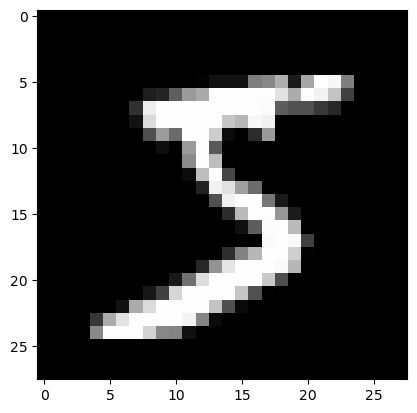

In [11]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)
# 784 is the number of pixel points per sample in the mnist dataset

In [12]:
# Note that the data needs to be converted into a tensor in order to participate in the subsequent modeling training.

In [13]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [14]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [15]:
bs = 64
xb = x_train[0:bs]
yb = y_train[0:bs]
weights = torch.randn([784, 10], dtype = torch.float, requires_grad = True)
bs = 64
bias = torch.zeros(10, requires_grad=True)

print(loss_func(model(xb), yb))

tensor(13.5589, grad_fn=<NllLossBackward0>)


In [16]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0, 5)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        x = self.out(x)
        return x

In [17]:
net = Mnist_NN()
print(net)

Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0, inplace=5)
)


In [18]:
# It is possible to print the weights and biases that we have defined in the name

In [19]:
for name, parameter in net.named_parameters():
    print(name, parameter, parameter.size())

hidden1.weight Parameter containing:
tensor([[-1.3702e-02, -2.6665e-02, -2.1086e-02,  ..., -9.2127e-05,
          1.7899e-02, -5.7987e-03],
        [ 9.6417e-03,  4.6165e-04, -1.8280e-02,  ..., -2.7166e-02,
          3.0257e-03,  6.2561e-03],
        [ 5.3429e-03,  1.1913e-02,  1.9953e-02,  ...,  7.4579e-04,
          3.3615e-02,  1.3624e-02],
        ...,
        [-1.1133e-02, -3.4185e-02, -8.4855e-03,  ...,  3.2248e-02,
          2.7688e-02, -1.9806e-02],
        [ 2.1797e-02, -2.8420e-02, -1.5579e-02,  ..., -1.0801e-02,
         -1.1152e-02,  1.7990e-02],
        [ 1.1494e-02,  2.6943e-02, -5.8070e-03,  ..., -2.6002e-02,
          2.3144e-02, -7.5404e-03]], requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([-2.0214e-02, -2.2622e-02,  1.9453e-02,  2.5724e-02,  1.0163e-02,
         3.1883e-02, -1.1714e-03, -3.1652e-02,  1.7530e-02,  2.1885e-02,
         9.2330e-03, -1.5537e-02, -1.1973e-02,  2.9829e-02, -1.8544e-02,
        -2.5792e-02, -2.4374e-02, 

## Using TensorDataset and DataLoader to Simplify

In [21]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [22]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [24]:
# Generally add model.train() when training the model, so that Batch Normalization and Dropout will be used normally.
# Generally choose model.eval() when testing the model, so that Batch Normalization and Dropout will not be used.

In [27]:
# Usage of zip

In [28]:
a = [1, 2, 3]
b = [4, 5, 6]
zipped = zip(a, b)
print(list(zipped))
a2, b2 = zip(*zip(a, b))
print(a2)
print(b2)

[(1, 4), (2, 5), (3, 6)]
(1, 2, 3)
(4, 5, 6)


In [26]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('Current step: '+ str(step), 'Validation set loss: '+ str(val_loss))

In [34]:
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.Adam(model.parameters(), lr=0.001) # Adam

In [35]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

In [36]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(20, model, loss_func, opt, train_dl, valid_dl)

Current step: 0 Validation set loss: 0.16085202368795873
Current step: 1 Validation set loss: 0.11706690677702426
Current step: 2 Validation set loss: 0.10161803787201643
Current step: 3 Validation set loss: 0.08986214860808105
Current step: 4 Validation set loss: 0.08974857210982591
Current step: 5 Validation set loss: 0.10015111278975382
Current step: 6 Validation set loss: 0.09764886646573431
Current step: 7 Validation set loss: 0.09260587435039924
Current step: 8 Validation set loss: 0.09464787554886425
Current step: 9 Validation set loss: 0.09225057169409119
Current step: 10 Validation set loss: 0.10755239833021042
Current step: 11 Validation set loss: 0.10347352268774557
Current step: 12 Validation set loss: 0.11411454963016149
Current step: 13 Validation set loss: 0.10532855942952737
Current step: 14 Validation set loss: 0.14395488545852714
Current step: 15 Validation set loss: 0.1145674369691831
Current step: 16 Validation set loss: 0.12807690756600132
Current step: 17 Validati

In [37]:
correct = 0
total = 0
for xb, yb in valid_dl:
    outputs = model(xb)
    _, predicated = torch.max(outputs.data, 1) # Maximum value and index
    total += yb.size(0)
    correct += (predicated == yb).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


### 
 - SGD 20epoch 88%
 - ADAM 20epoch 97%